In [ ]:
import zipfile
import os

zip_path = "/content/dataset.zip"
extract_dir = "/content/fraud_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extracted folders:", os.listdir(extract_dir))

Extracted folders: ['data']


In [ ]:
import os

data_folder = os.path.join(extract_dir, 'data')
print("Files inside data folder:", os.listdir(data_folder))

Files inside data folder: ['2018-09-05.pkl', '2018-05-06.pkl', '2018-08-05.pkl', '2018-07-20.pkl', '2018-08-26.pkl', '2018-08-15.pkl', '2018-09-27.pkl', '2018-07-24.pkl', '2018-06-30.pkl', '2018-06-04.pkl', '2018-07-29.pkl', '2018-06-16.pkl', '2018-07-23.pkl', '2018-05-21.pkl', '2018-06-22.pkl', '2018-09-15.pkl', '2018-04-07.pkl', '2018-08-18.pkl', '2018-04-08.pkl', '2018-04-18.pkl', '2018-06-10.pkl', '2018-04-09.pkl', '2018-08-30.pkl', '2018-08-28.pkl', '2018-07-11.pkl', '2018-07-22.pkl', '2018-07-25.pkl', '2018-06-05.pkl', '2018-05-10.pkl', '2018-07-12.pkl', '2018-07-26.pkl', '2018-05-02.pkl', '2018-09-28.pkl', '2018-06-06.pkl', '2018-04-21.pkl', '2018-05-03.pkl', '2018-05-26.pkl', '2018-09-07.pkl', '2018-04-01.pkl', '2018-08-09.pkl', '2018-04-24.pkl', '2018-06-27.pkl', '2018-05-01.pkl', '2018-06-24.pkl', '2018-05-17.pkl', '2018-04-30.pkl', '2018-09-11.pkl', '2018-05-09.pkl', '2018-09-29.pkl', '2018-07-14.pkl', '2018-05-19.pkl', '2018-07-16.pkl', '2018-08-21.pkl', '2018-06-14.pkl', '

In [ ]:
import pandas as pd
import os

data_folder = "/content/fraud_dataset/data"

pkl_files_all = sorted([f for f in os.listdir(data_folder) if f.endswith('.pkl')])

dfs_all = [pd.read_pickle(os.path.join(data_folder, file)) for file in pkl_files_all]
combined_df_all = pd.concat(dfs_all, ignore_index=True)

print(combined_df_all.head())

print("Fraud counts:")
print(combined_df_all['TX_FRAUD'].value_counts())

   TRANSACTION_ID         TX_DATETIME CUSTOMER_ID TERMINAL_ID  TX_AMOUNT  \
0               0 2018-04-01 00:00:31         596        3156      57.16   
1               1 2018-04-01 00:02:10        4961        3412      81.51   
2               2 2018-04-01 00:07:56           2        1365     146.00   
3               3 2018-04-01 00:09:29        4128        8737      64.49   
4               4 2018-04-01 00:10:34         927        9906      50.99   

  TX_TIME_SECONDS TX_TIME_DAYS  TX_FRAUD  TX_FRAUD_SCENARIO  
0              31            0         0                  0  
1             130            0         0                  0  
2             476            0         0                  0  
3             569            0         0                  0  
4             634            0         0                  0  
Fraud counts:
TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64


In [ ]:
pkl_files_all = sorted(os.listdir(data_folder))
dfs_all = [pd.read_pickle(os.path.join(data_folder, file)) for file in pkl_files_all]
combined_df_all = pd.concat(dfs_all, ignore_index=True)

fraud_counts_all = combined_df_all['TX_FRAUD'].value_counts()
print("Fraud Counts (all files):")
print(fraud_counts_all)

Fraud Counts (all files):
TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64


In [ ]:
print("=== Data Info ===")
print(combined_df_all.info())

print("\n=== Summary Statistics ===")
print(combined_df_all.describe(include='all'))

print("\n=== Missing Values ===")
print(combined_df_all.isnull().sum())

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        object        
 3   TERMINAL_ID        object        
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    object        
 6   TX_TIME_DAYS       object        
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 120.4+ MB
None

=== Summary Statistics ===
        TRANSACTION_ID                    TX_DATETIME  CUSTOMER_ID  \
count     1.754155e+06                        1754155    1754155.0   
unique             NaN                            NaN       4990.0   
top                NaN                            NaN        382.0   
freq               NaN                       

<ipython-input-6-95fedb1db507>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TX_FRAUD', data=combined_df_all, palette=['green', 'red'])


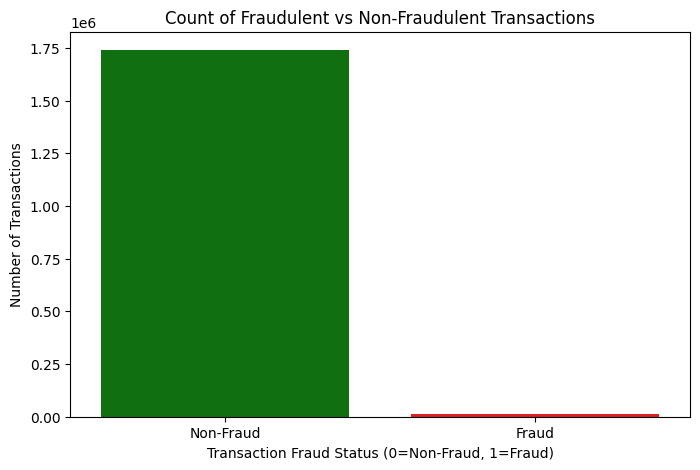

Non-Fraudulent transactions: 1739474
Fraudulent transactions: 14681


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='TX_FRAUD', data=combined_df_all, palette=['green', 'red'])
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Fraud Status (0=Non-Fraud, 1=Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.show()

fraud_counts = combined_df_all['TX_FRAUD'].value_counts()
print(f"Non-Fraudulent transactions: {fraud_counts.get(0,0)}")
print(f"Fraudulent transactions: {fraud_counts.get(1,0)}")

<ipython-input-7-aeaa9b8c9d0d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TX_FRAUD', y='TX_AMOUNT', data=combined_df_all, palette=['green', 'red'])


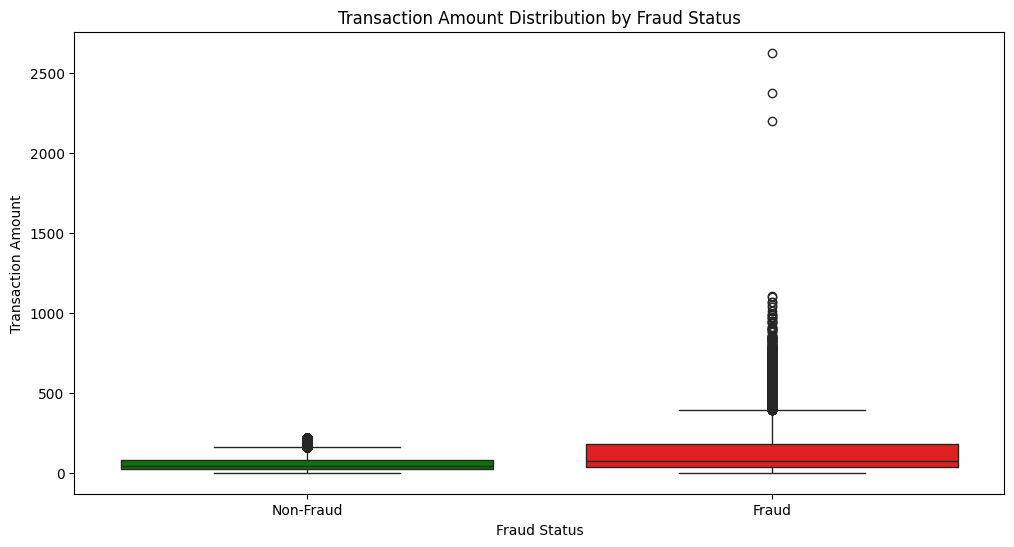

Median Transaction Amounts:
Non-Fraud: 44.49
Fraud: 72.22


In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='TX_FRAUD', y='TX_AMOUNT', data=combined_df_all, palette=['green', 'red'])
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Amount')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.show()

median_amounts = combined_df_all.groupby('TX_FRAUD')['TX_AMOUNT'].median()
print("Median Transaction Amounts:")
print(f"Non-Fraud: {median_amounts.get(0, 0):.2f}")
print(f"Fraud: {median_amounts.get(1, 0):.2f}")

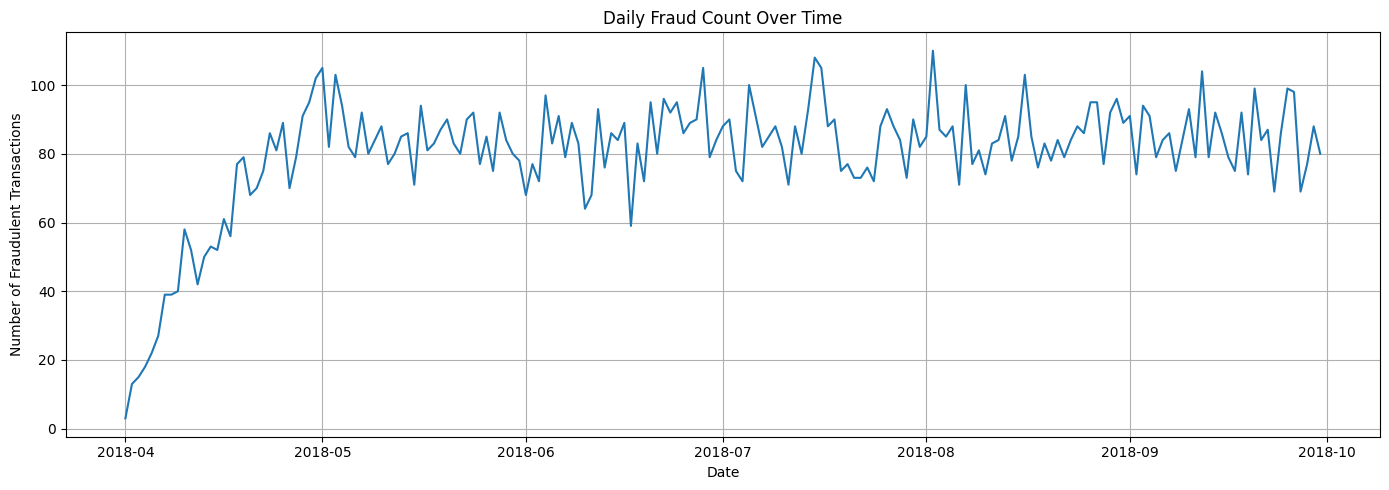

Daily Fraud Counts (First 5 Days):
TX_DATE
2018-04-01     3
2018-04-02    13
2018-04-03    15
2018-04-04    18
2018-04-05    22
Name: TX_FRAUD, dtype: int64

Daily Fraud Counts (Last 5 Days):
TX_DATE
2018-09-26    98
2018-09-27    69
2018-09-28    77
2018-09-29    88
2018-09-30    80
Name: TX_FRAUD, dtype: int64


In [ ]:
combined_df_all['TX_DATE'] = combined_df_all['TX_DATETIME'].dt.date
daily_fraud = combined_df_all.groupby('TX_DATE')['TX_FRAUD'].sum()

plt.figure(figsize=(14,5))
daily_fraud.plot()
plt.title("Daily Fraud Count Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Fraudulent Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Daily Fraud Counts (First 5 Days):")
print(daily_fraud.head())
print("\nDaily Fraud Counts (Last 5 Days):")
print(daily_fraud.tail())

<ipython-input-9-6492fde9ec23>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_fraud.values, y=customer_fraud.index, palette='Reds_r')


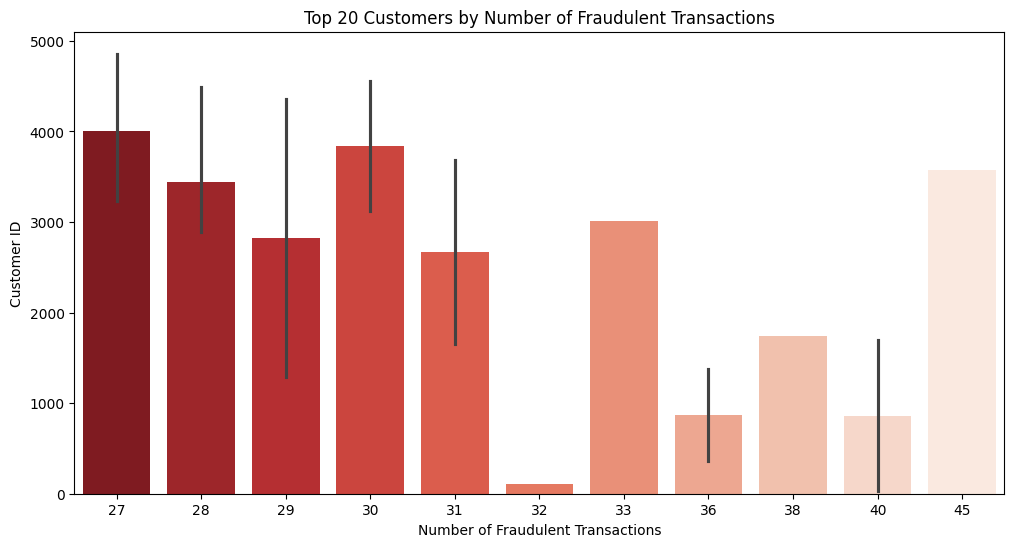

Top 20 Customers with Most Fraudulent Transactions:
CUSTOMER_ID
3570    45
1692    40
27      40
1743    38
365     36
1376    36
3013    33
112     32
3690    31
1657    31
3116    30
4557    30
4354    29
1288    29
2938    28
4494    28
2891    28
4858    27
3227    27
3936    27
Name: count, dtype: int64


In [ ]:
customer_fraud = combined_df_all[combined_df_all['TX_FRAUD'] == 1]['CUSTOMER_ID'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=customer_fraud.values, y=customer_fraud.index, palette='Reds_r')
plt.title('Top 20 Customers by Number of Fraudulent Transactions')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('Customer ID')
plt.show()

print("Top 20 Customers with Most Fraudulent Transactions:")
print(customer_fraud)

Top 20 Terminals with Most Fraudulent Transactions:
TERMINAL_ID
293     85
1244    72
3644    59
7054    50
4692    48
5158    47
1783    47
9251    47
596     46
4865    45
3637    44
4019    44
70      44
5185    44
3104    44
4876    44
1902    42
6088    42
79      42
445     41
Name: count, dtype: int64


<ipython-input-10-6ab9efdea2d4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terminals.values, y=top_terminals.index, palette='Oranges_r')


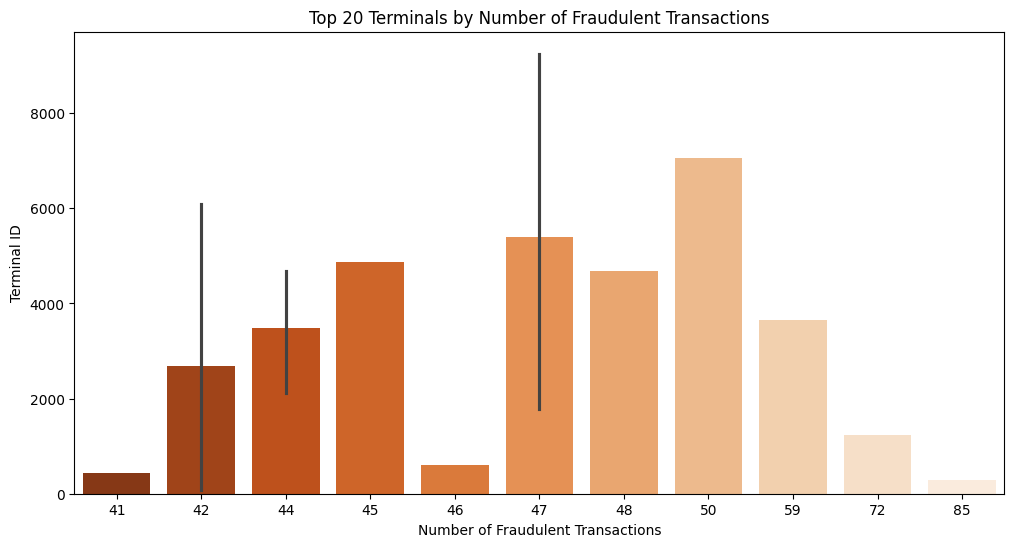

In [ ]:
fraud_transactions = combined_df_all[combined_df_all['TX_FRAUD'] == 1]

fraud_by_terminal = fraud_transactions['TERMINAL_ID'].value_counts()

top_terminals = fraud_by_terminal.head(20)

print("Top 20 Terminals with Most Fraudulent Transactions:")
print(top_terminals)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=top_terminals.values, y=top_terminals.index, palette='Oranges_r')
plt.title('Top 20 Terminals by Number of Fraudulent Transactions')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('Terminal ID')
plt.show()

Top 20 Terminals by Fraud Ratio (with at least 10 transactions):
TERMINAL_ID
1244    0.356436
7054    0.322581
293     0.286195
3644    0.271889
596     0.264368
4996    0.244094
2528    0.227941
4876    0.211538
9585    0.210526
7926    0.209790
1122    0.209459
7272    0.208791
522     0.207101
1196    0.205882
9052    0.204082
79      0.202899
2293    0.202797
5912    0.202532
4019    0.201835
4923    0.201220
Name: count, dtype: float64


<ipython-input-11-7a34564829e3>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fraud_ratio.values, y=top_fraud_ratio.index, palette='Purples_r')


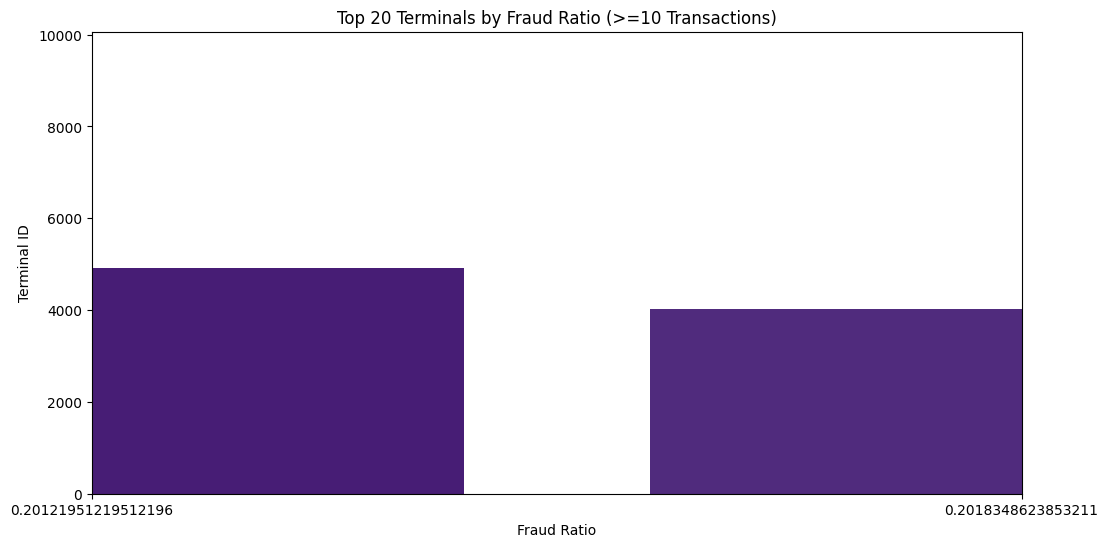

In [ ]:
total_by_terminal = combined_df_all['TERMINAL_ID'].value_counts()

fraud_ratio_by_terminal = fraud_by_terminal / total_by_terminal

fraud_ratio_filtered = fraud_ratio_by_terminal[total_by_terminal >= 10].dropna()

top_fraud_ratio = fraud_ratio_filtered.sort_values(ascending=False).head(20)

print("Top 20 Terminals by Fraud Ratio (with at least 10 transactions):")
print(top_fraud_ratio)

plt.figure(figsize=(12,6))
sns.barplot(x=top_fraud_ratio.values, y=top_fraud_ratio.index, palette='Purples_r')
plt.title('Top 20 Terminals by Fraud Ratio (>=10 Transactions)')
plt.xlabel('Fraud Ratio')
plt.ylabel('Terminal ID')
plt.xlim(0, 1)
plt.show()

In [ ]:
combined_df_all = combined_df_all.sort_values('TX_DATETIME')

combined_df_all['TX_DATETIME'] = pd.to_datetime(combined_df_all['TX_DATETIME'])

combined_df_all['TERMINAL_FRAUD_HISTORY'] = (
    combined_df_all
    .groupby('TERMINAL_ID')['TX_FRAUD']
    .transform(lambda x: x.shift().rolling(window=100, min_periods=1).sum())
)

In [ ]:
combined_df_all['CUSTOMER_AVG_AMOUNT'] = (
    combined_df_all
    .groupby('CUSTOMER_ID')['TX_AMOUNT']
    .transform(lambda x: x.shift().expanding().mean())
)

combined_df_all['AMOUNT_OVER_AVG'] = combined_df_all['TX_AMOUNT'] / (combined_df_all['CUSTOMER_AVG_AMOUNT'] + 1)

In [ ]:
features = ['TX_AMOUNT', 'TERMINAL_FRAUD_HISTORY', 'AMOUNT_OVER_AVG']
X = combined_df_all[features].fillna(0)
y = combined_df_all['TX_FRAUD']

In [ ]:
import pandas as pd
import numpy as np

df = combined_df_all.copy()
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

unique_days = df['TX_DATETIME'].dt.floor('D').sort_values().unique()

fraud_terminal_days = {}

for day in unique_days:

    fraud_terminals_today = df[
        (df['TX_DATETIME'].dt.floor('D') == day) & (df['TX_FRAUD'] == 1)
    ]['TERMINAL_ID'].unique()

    for terminal in fraud_terminals_today:
        for offset in range(29):
            fraud_day = day + pd.Timedelta(days=offset)
            fraud_terminal_days.setdefault(fraud_day, set()).add(terminal)

def is_fraud_terminal(row):
    day = row['TX_DATETIME'].floor('D')
    terminal = row['TERMINAL_ID']
    return terminal in fraud_terminal_days.get(day, set())

df['SCENARIO2_FRAUD_TERMINAL'] = df.apply(is_fraud_terminal, axis=1)

scenario2_df = df[df['SCENARIO2_FRAUD_TERMINAL'] == True]

fraud_customer_days = {}

for day in unique_days:
    fraud_customers_today = df[
        (df['TX_DATETIME'].dt.floor('D') == day) & (df['TX_FRAUD'] == 1)
    ]['CUSTOMER_ID'].unique()

    for customer in fraud_customers_today:
        for offset in range(15):
            fraud_day = day + pd.Timedelta(days=offset)
            fraud_customer_days.setdefault(fraud_day, set()).add(customer)

def is_fraud_customer(row):
    day = row['TX_DATETIME'].floor('D')
    customer = row['CUSTOMER_ID']
    return customer in fraud_customer_days.get(day, set())

df['SCENARIO3_FRAUD_CUSTOMER'] = df.apply(is_fraud_customer, axis=1)

scenario3_df = df[df['SCENARIO3_FRAUD_CUSTOMER'] == True]

print(f"Scenario 2 transactions: {scenario2_df.shape[0]}")
print(f"Scenario 3 transactions: {scenario3_df.shape[0]}")

scenario1_df = df[df['TX_AMOUNT'] > 220]

Scenario 2 transactions: 157455
Scenario 3 transactions: 296031


In [ ]:
df['AMOUNT_OVER_AVG'] = df['TX_AMOUNT'] / df.groupby('CUSTOMER_ID')['TX_AMOUNT'].transform('mean')
df['TERMINAL_FRAUD_HISTORY'] = df.groupby('TERMINAL_ID')['TX_FRAUD'].transform('cumsum')

features = ['TX_AMOUNT', 'AMOUNT_OVER_AVG', 'TERMINAL_FRAUD_HISTORY']

X = df[features]
y = df['TX_FRAUD']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier(
    n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42
)
xgb_model.fit(X_train_scaled, y_train_res)

y_pred = xgb_model.predict(X_test_scaled)
print("Overall Model Performance:")
print(classification_report(y_test, y_pred))

def evaluate_scenario(df_scenario, name):
    X_s = df_scenario[features]
    y_s = df_scenario['TX_FRAUD']
    X_s_scaled = scaler.transform(X_s)
    y_pred_s = xgb_model.predict(X_s_scaled)
    print(f"\n{name} Evaluation:")
    print(classification_report(y_s, y_pred_s))

evaluate_scenario(scenario1_df, "Scenario 1")
evaluate_scenario(scenario2_df, "Scenario 2")
evaluate_scenario(scenario3_df, "Scenario 3")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:07:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Overall Model Performance:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    347895
           1       0.18      0.92      0.29      2936

    accuracy                           0.96    350831
   macro avg       0.59      0.94      0.64    350831
weighted avg       0.99      0.96      0.98    350831


Scenario 1 Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.25      0.40      3258

    accuracy                           0.25      3258
   macro avg       0.50      0.12      0.20      3258
weighted avg       1.00      0.25      0.40      3258



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Scenario 2 Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90    142774
           1       0.30      0.64      0.41     14681

    accuracy                           0.83    157455
   macro avg       0.63      0.75      0.66    157455
weighted avg       0.90      0.83      0.85    157455


Scenario 3 Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97    281350
           1       0.51      0.64      0.57     14681

    accuracy                           0.95    296031
   macro avg       0.74      0.80      0.77    296031
weighted avg       0.96      0.95      0.95    296031



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

scenario1_df = combined_df_all[combined_df_all['TX_AMOUNT'] > 220].copy()

X = scenario1_df[['TX_AMOUNT']]
y = scenario1_df['TX_FRAUD']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

if len(y_train.unique()) > 1:
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
else:
    print("⚠️ Only one class in training set. Skipping SMOTE.")
    X_train_res, y_train_res = X_train, y_train

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train_res)

y_pred = rf_model.predict(X_test_scaled)

print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

⚠️ Only one class in training set. Skipping SMOTE.
📊 Confusion Matrix:
 [[652]]

📋 Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       652

    accuracy                           1.00       652
   macro avg       1.00      1.00      1.00       652
weighted avg       1.00      1.00      1.00       652



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
